In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [25]:
framerate = 44100
T = 1 # 1 sec
t = np.linspace(0, T, framerate)
f = 440

---
## <center>Genererating different waveforms</center>

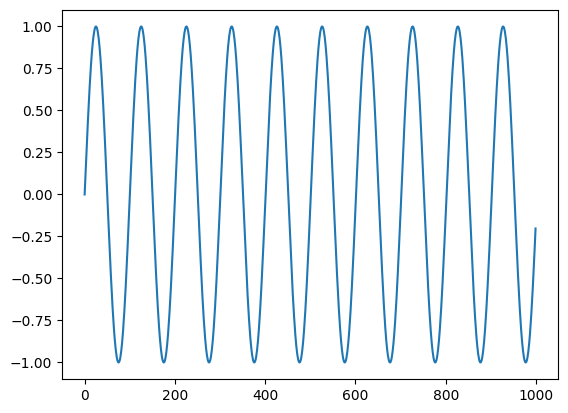

In [26]:
sin = np.sin(2 * np.pi * f * t)
display(Audio(sin, rate=framerate))

plt.plot(sin[:1000])
plt.show()

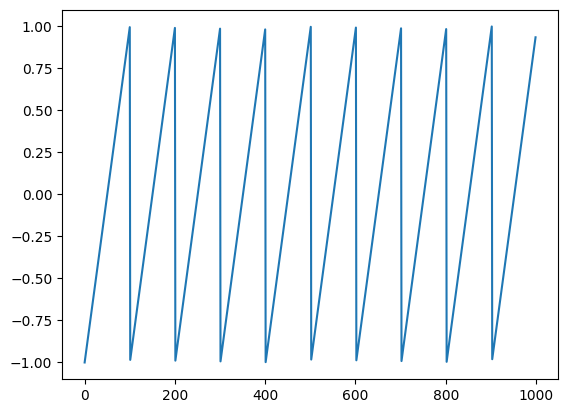

In [31]:
saw = (2 * f * t) % 2 - 1
display(Audio(saw, rate=framerate))

plt.plot(saw[:1000])
plt.show()

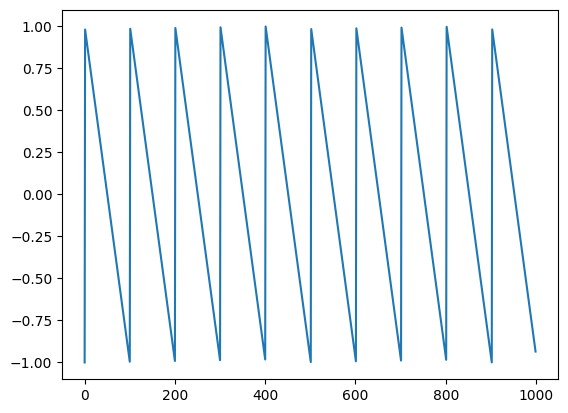

In [67]:
inv_saw = (-2 * f * t) % 2 - 1
display(Audio(inv_saw, rate=framerate))

plt.plot(inv_saw[:1000])
plt.show()

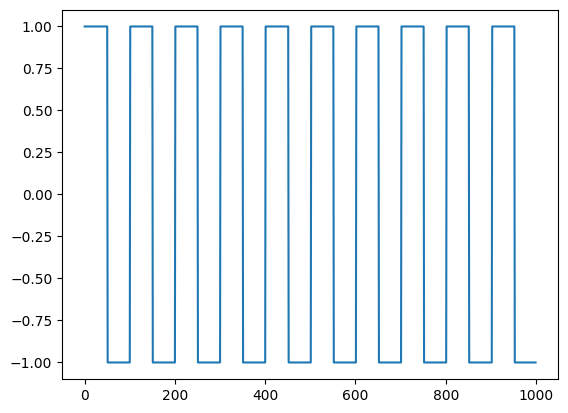

In [86]:
square = np.where(((2 * f * t) % 2) > 1, -1, 1) 
display(Audio(square, rate=framerate))

plt.plot(square[:1000])
plt.show()

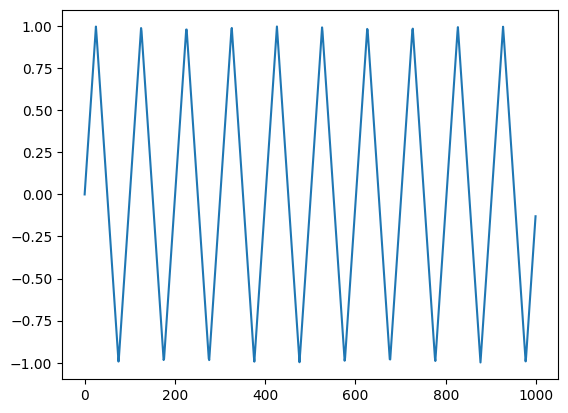

In [65]:
triangular = np.abs((((2 * f * t) - 0.5) % 2) - 1) * 2 - 1
display(Audio(triangular, rate=framerate))

plt.plot(triangular[:1000])
plt.show()

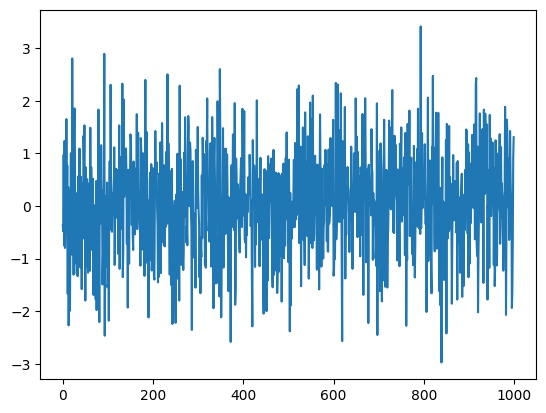

In [100]:
white_noise = np.random.normal(0, 1, size=t.size)
display(Audio(white_noise, rate=framerate))

plt.plot(white_noise[:1000])
plt.show()

---
## <center>Distortion filters</center>

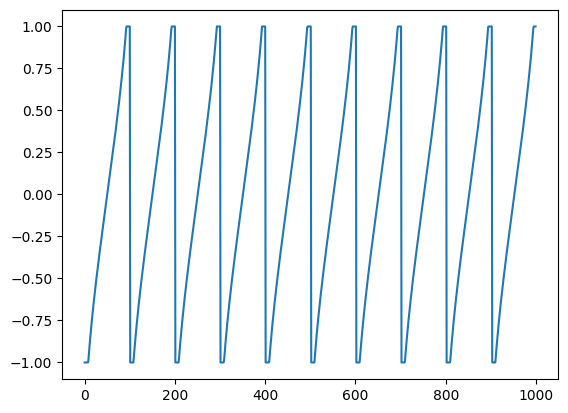

In [101]:
distortion = lambda sound : np.clip(np.arcsin(sound), -1, 1)
display(Audio(distortion(saw), rate=framerate))

plt.plot(distortion(saw)[:1000])
plt.show()

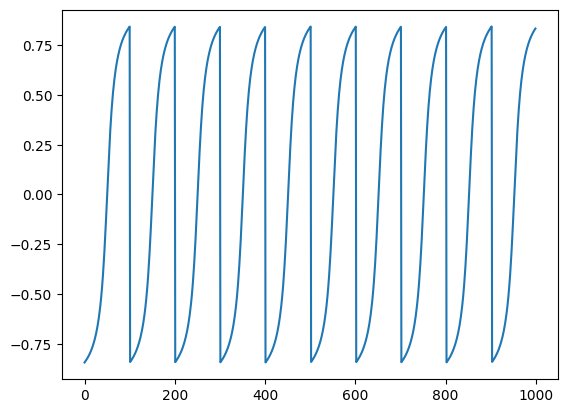

In [114]:
distortion_2 = lambda sound : (2 / np.pi) * np.arctan(4 * sound)
display(Audio(distortion_2(saw), rate=framerate))

plt.plot(distortion_2(saw)[:1000])
plt.show()

---
## <center>ADSR Envelope filter</center>

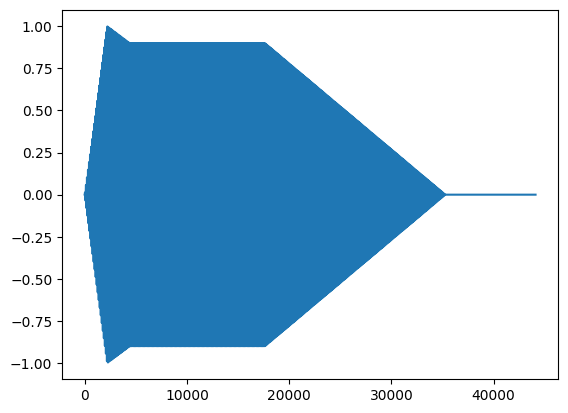

In [399]:
ATTACK_TIME = 0.05
DECAY_TIME = 0.05
SUSTAIN_TIME = 0.3
RELEASE_TIME = 0.4

SUSTAIN_LEVEL = 0.9

def envelope(signal, note_duration, framerate):    
    attack = np.linspace(0, 1, int(framerate * ATTACK_TIME * note_duration))
    decay = np.linspace(1, SUSTAIN_LEVEL, int(framerate * DECAY_TIME * note_duration))
    sustain = np.full((int(framerate * SUSTAIN_TIME * note_duration), ), SUSTAIN_LEVEL)
    release = np.linspace(SUSTAIN_LEVEL, 0, int(framerate * RELEASE_TIME * note_duration))
    
    missing_len = signal.size - (attack.size + decay.size + sustain.size + release.size)
    
    adsr = np.concatenate((attack, decay, sustain,release, np.zeros(missing_len)))
    return signal * adsr

plt.plot(envelope(sin, T, framerate))
plt.show()

---
## <center>Note to frequency conversion</center>

In [370]:
# C0: octave: 0, note = 0
# C♯0: octave: 0, note = 1
# ...
# A0: octave: 0, note = 9
# ...
# B0: octave = 0, note = 11 
# C1: octave = 1, note = 0
# ...
# A1: octave = 1, note = 9 
# ...
# A4: octave = 4, note = 9
def note_to_frequency(octave, note):
    f = 440 # A4 = 440
    n = (octave - 4) * 12 + (note - 9) 
    return round(f * np.power(2, n/12), 5)

notes_str = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
note_dict = {}
for octave in range(0, 9):
        for i in range(0, 12):
            note_dict[notes_str[i] + str(octave)] = note_to_frequency(octave, i)
print(note_dict)

{'C0': 16.3516, 'C#0': 17.32391, 'D0': 18.35405, 'D#0': 19.44544, 'E0': 20.60172, 'F0': 21.82676, 'F#0': 23.12465, 'G0': 24.49971, 'G#0': 25.95654, 'A0': 27.5, 'A#0': 29.13524, 'B0': 30.86771, 'C1': 32.7032, 'C#1': 34.64783, 'D1': 36.7081, 'D#1': 38.89087, 'E1': 41.20344, 'F1': 43.65353, 'F#1': 46.2493, 'G1': 48.99943, 'G#1': 51.91309, 'A1': 55.0, 'A#1': 58.27047, 'B1': 61.73541, 'C2': 65.40639, 'C#2': 69.29566, 'D2': 73.41619, 'D#2': 77.78175, 'E2': 82.40689, 'F2': 87.30706, 'F#2': 92.49861, 'G2': 97.99886, 'G#2': 103.82617, 'A2': 110.0, 'A#2': 116.54094, 'B2': 123.47083, 'C3': 130.81278, 'C#3': 138.59132, 'D3': 146.83238, 'D#3': 155.56349, 'E3': 164.81378, 'F3': 174.61412, 'F#3': 184.99721, 'G3': 195.99772, 'G#3': 207.65235, 'A3': 220.0, 'A#3': 233.08188, 'B3': 246.94165, 'C4': 261.62557, 'C#4': 277.18263, 'D4': 293.66477, 'D#4': 311.12698, 'E4': 329.62756, 'F4': 349.22823, 'F#4': 369.99442, 'G4': 391.99544, 'G#4': 415.3047, 'A4': 440.0, 'A#4': 466.16376, 'B4': 493.8833, 'C5': 523.25

---
## <center>Everything put together</center>

In [371]:
def notes_list_to_freq(l):
    return [note_dict[note] for note in l]

au_clair_de_la_lune = ['G4','G4','G4','A4','B4','A4','G4','B4','A4','A4','G4']
au_clair_de_la_lune_rythm = [0.5,0.5,0.5,0.5,1,1,0.5,0.5,0.5,0.5,2]

total_duration=8.0 sec
total_len=352800 samples


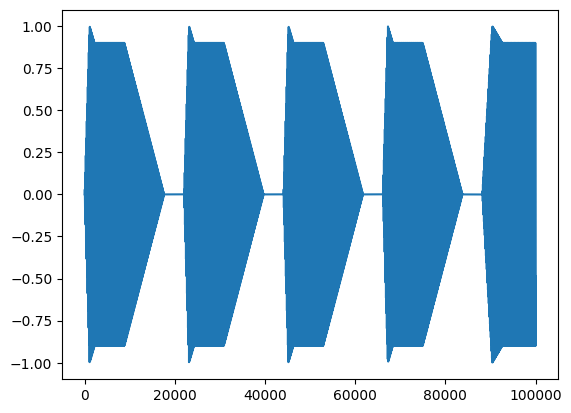

In [398]:
FRAMERATE = 44100

SIN = 0
SAW = 1
INV_SAW = 2
SQUARE = 3
TRI = 4

def player(waveform=SIN, partition=['A4'], note_duration=[0.5]):
    num_note = len(partition)
    # if we passed a partition to play but none or only one note_duration value,
    # we apply this duration value to all the notes in the partition
    if (len(note_duration)  == 1) and (num_note > 1):
        note_duration = num_note * note_duration
    
    total_duration = sum(note_duration)
    print(f'{total_duration=} sec')
    total_len = int(total_duration * FRAMERATE)
    print(f'{total_len=} samples')
    t = np.linspace(0, total_duration, total_len)
    
    if waveform == SIN:
        func = lambda f, x : np.sin(2 * np.pi * f * x) 
    elif waveform == SAW:
        func = lambda f, x : (2 * f* x) % 2 - 1
    elif waveform == INV_SAW:
        func = lambda f, x : (-2 * f * x) % 2 - 1
    elif waveform == SQUARE:
        func = lambda f, x : np.where(((2 * f * x) % 2) > 1, -1, 1)
    elif waveform == TRI:
        func = lambda f, x : np.abs((((2 * f * x) - 0.5) % 2) - 1) * 2 - 1
    
    # for every note and corresponding duration, 
    # we apply the waveform followed by the envelope to the raw sample values on the specific interval
    # we keep track of where we are in the sample with the 'total' value
    total = 0
    for freq, duration in zip(notes_list_to_freq(partition), note_duration):
        note_samples = int(FRAMERATE * duration)
        t[total : total + note_samples] = envelope(func(freq, t[total : total + note_samples]), duration, FRAMERATE)
        total += note_samples
    return t

aud = player(SIN, partition=au_clair_de_la_lune, note_duration=au_clair_de_la_lune_rythm)
display(Audio(aud, rate=FRAMERATE))
plt.plot(aud[:100000])
plt.show()